<div class="alert alert-block alert-info">
<b>Number of points for this notebook:</b> 2
<br>
<b>Deadline:</b> March 10, 2021 (Wednesday) 23:00
</div>

# Exercise 1.1. Train a multilayer perceptron (MLP) with pytorch.

The goal of this exercise is to get familiar with the basics of PyTorch and train a multilayer perceptron (MLP) model.

If you are not familiar with PyTorch, there is a number of good tutorials [here](https://pytorch.org/tutorials/index.html). We recommend the following ones:
* [What is PyTorch?](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)
* [Autograd: Automatic Differentiation](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)
* [Learning PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
* [Neural Networks](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py)

In [60]:
skip_training = False  # Set this flag to True before validation and submission

In [61]:
# During evaluation, this cell sets skip_training to True
# skip_training = True

In [62]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

import tools

In [63]:
# Select device which you are going to use for training
#device = torch.device("cuda:0")
device = torch.device("cpu")

In [64]:
if skip_training:
    # The models are always evaluated on CPU
    device = torch.device("cpu")

# Data

We will train the MLP on a toy regression problem.

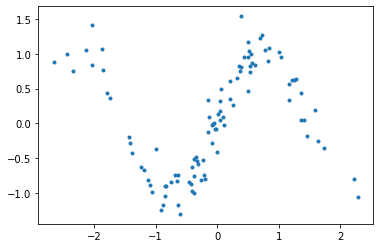

In [65]:
# Let us generate toy data
def get_data():
    np.random.seed(2)
    x = np.random.randn(100, 1)
    x = np.sort(x, axis=0)

    targets = np.sin(x * 2 * np.pi / 3)
    targets = targets + 0.2 * np.random.randn(*targets.shape)

    # Convert to PyTorch tensors
    x = torch.FloatTensor(x)
    targets = torch.FloatTensor(targets)
    
    return x, targets

x, targets = get_data()
# Plot the data
fig, ax = plt.subplots(1)
ax.plot(x, targets, '.')

# Multilayer perceptron (MLP) network with two hidden layers

We will create a simple multilayer perceptron (MLP) network. The model has
- input dimensionality 1
- one hidden layer with 10 units with Tanh nonlinearity
- one hidden layer with 11 units with Tanh nonlinearity
- linear output layer with output dimensionality 1 and no nonlinearity.

Hints:
* You may want to look at [this tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) for reference.
* You can use [`nn.Linear`](https://pytorch.org/docs/stable/nn.html?highlight=nn%20linear#torch.nn.Linear)
module to define the fully-connected layers of the MLP.
* Simple architectures are usually created using module [`torch.nn.Sequential`](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential). You do not have to use this module in this exercise.

In [66]:
class MLP(nn.Module):
    def __init__(self, n_inputs=1):
        super(MLP, self).__init__()
        self.inputSize = n_inputs
        self.layers = nn.Sequential(
            nn.Linear(self.inputSize, 10, bias=True),
            nn.Tanh(),
            nn.Linear(10, 11, bias=True),
            nn.Tanh(),
            nn.Linear(11, 1, bias=True),
        )
        
        #self.hiddenLayer1 = nn.Tanh(self.inputSize, 10)
        #self.hiddenLayer2 = nn.Tanh(self.inputSize, 11)
        #self.relu = nn.ReLU()
        #self.fc2 = nn.Linear(self.hidden_size, 1)
        #self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        Args:
          x of shape (n_samples, n_inputs): Model inputs.
        
        Returns:
          y of shape (n_samples, 1): Model outputs.
        """
        return self.layers(x)
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.sigmoid(output)
        return output

In [67]:
# Let us create the network and make sure it can process a random input of the right shape
def test_MLP_shapes():
    n_inputs = 1
    n_samples = 10
    net = MLP()
    y = net(torch.randn(n_samples, n_inputs))
    assert y.shape == torch.Size([n_samples, 1]), f"Bad y.shape={y.shape}"
    print('Success')

test_MLP_shapes()

Success


## Train the MLP network

### Training loop

Your task is to implement the training loop.
You may find it useful to look at [this tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py).
Your should have the following steps:
* Set all gradient values to zeros.
* Calculate the output of the model for all training examples.
* Calculate the MSE loss (see [`mse_loss`](https://pytorch.org/docs/stable/nn.functional.html?highlight=mse_loss#torch.nn.functional.mse_loss)).
* Backpropagate the gradients: compute the gradients of the loss wrt to all the parameters of the model.
* Update the parameters of the model using the chosen optimizer.


Recommended hyperparameters:
* [Adam optimizer](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) with learning rate 0.01.
* You can process the data in the full-batch model (computing the gradients using all training data).
* Number of iterations (parameter updates): 200.

In [54]:
# Create the model
model = MLP()
model.to(device)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=11, bias=True)
    (3): Tanh()
    (4): Linear(in_features=11, out_features=1, bias=True)
  )
)

In [71]:
# Implement the training loop here
if not skip_training:
    criterion = nn.MSELoss()
    # all gradient vals to zeros?
    model.zero_grad()
    # Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    model.train()
    loops = 200
    for i in range(loops):
        # in your training loop:
        optimizer.zero_grad()   # zero the gradient buffers
        output = model(x) # calucalte output for all training...
        loss = criterion(output, targets) # calculate MSE loss
        loss.backward() # Backpropogate the gradients
        optimizer.step() # Update parameters to model
    
    model.eval()

In [72]:
# Save the model to disk (the pth-files will be submitted automatically together with your notebook)
# Set confirm=False if you do not want to be asked for confirmation before saving.
if not skip_training:
    tools.save_model(model, '2_mlp.pth', confirm=True)

Model saved to 2_mlp.pth.


In [73]:
if skip_training:
    model = MLP()
    tools.load_model(model, '2_mlp.pth', device)

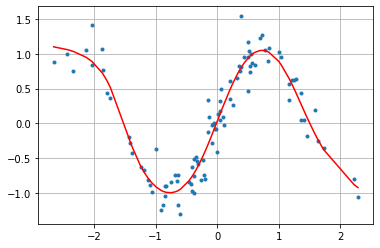

In [74]:
# Plot the trained MLP
with torch.no_grad():
    fig, ax = plt.subplots(1)
    ax.plot(x, targets, '.')
    y = model(x)
    ax.plot(x, y.numpy(), 'r-')
    ax.grid(True)

In [75]:
# This cell tests MLP

In [76]:
# This cell tests MLP